In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import entropy
import seaborn as sns

sdata=pd.read_csv('demo_data/top50_POI_sta.csv')
poi=sdata.iloc[:,-11:]
entropies = poi.apply(lambda x: entropy(x.value_counts(normalize=True), base=2), axis=1)
sdata['entropies']=entropies


In [ ]:
def CorrPOI(CITY,data_list,sdata):
    sdata=sdata
    CITY=CITY
    data_list=data_list
    communitydata=pd.read_csv(f'result_{CITY}.csv')
    communitydata.rename(columns={'GISJOIN_1': 'GISJOIN'}, inplace=True)


    data = pd.merge(communitydata, sdata, on='GISJOIN')
    data=data[data['entropies']!=0]


    threshold=0.5

    plt.style.use('seaborn-whitegrid')


    col_com=['0','1','2','3','4','5','6','7','8','9']
    for col in col_com:
        data[col] = data[col].apply(lambda x: 1 if x > threshold else 0)

    data['overlap_count']=data[col_com].sum(axis=1)


    data=data.dropna(subset=['overlap_count'])

    mean_pd=pd.DataFrame(data.groupby('overlap_count')['entropies'].mean())

    #test differnet poi category

    mean_pd['overlap_count']=mean_pd.index


    x=mean_pd['overlap_count']
    y=mean_pd['entropies']

    merge=pd.concat([x,y],axis=1)
    #merge.to_csv('D:/weekendpoi.csv')

    corr = np.corrcoef(x, y)[0, 1]
    data_list.append({'City': city, 'Correlation': corr})

    print("Correlation coefficient:", corr)

    precision = 2
    formatted_corr = f"{corr:.{precision}f}"
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)


    ax1=plt.subplot(1, 2, 1)
   # ax1.text(0.5, 0.95, f"r={formatted_corr}", ha='center', va='center', transform=ax1.transAxes,fontsize=12)


    plt.scatter(x, y,c='#A569BD',s=10)
    plt.plot(x, p(x), "r",linewidth=2)


    ax2=plt.subplot(1, 2,2)#  box plot
    grouped_data = [data[data['overlap_count'] == group]['entropies'] for group in np.sort(data['overlap_count'].unique())]

    plt.boxplot(grouped_data, showfliers=False,showmeans=True,labels=np.sort(data['overlap_count'].unique()))


    plt.suptitle('Overlapping index and POI entropy',fontsize=15, color='k')



New York


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.9687106995716357
Albuquerque
Correlation coefficient: 0.9829253545222143
Atlanta


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.959989391630448
Austin
Correlation coefficient: 0.9854745017386167
Bakersfield


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.9204555172791153
Baltimore
Correlation coefficient: 0.9715236500743345
Boston


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.9922521642578045
Charlotte
Correlation coefficient: 0.9641762667456183
Chicago


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.951341234320368
Colorado Springs
Correlation coefficient: 0.9859919092243241
Columbus


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.9097620577871823
Dallas
Correlation coefficient: 0.9089055834856428
Denver


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API

Correlation coefficient: 0.984486366786283
Detroit
Correlation coefficient: 0.9404753577752138
El Paso
Correlation coefficient: 0.9228649586870455
Fort Worth
Correlation coefficient: 0.9839785288434905
Fresno


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.9912445296702108
Houston
Correlation coefficient: 0.9651135097125673


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Indianapolis
Correlation coefficient: 0.9948049878622008
Jacksonville


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API

Correlation coefficient: 0.9862247194295373
Kansas City
Correlation coefficient: 0.9847423327959576
Las Vegas
Correlation coefficient: 0.981780792039716
Long Beach
Correlation coefficient: 0.8503960201860651
Los Angeles


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.946997760497851
Louisville+Jefferson County metro government
Correlation coefficient: 0.9881111849075683
Memphis


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.9933467703033412
Mesa
Correlation coefficient: 0.8308417077340725
Miami


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API

Correlation coefficient: 0.9724545917498446
Milwaukee
Correlation coefficient: 0.9850846549281304
Minneapolis


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.86995166358148
Nashville-Davidson metropolitan government
Correlation coefficient: 0.9726082142266689
Oakland


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API

Correlation coefficient: 0.876772404063358
Oklahoma City
Correlation coefficient: 0.9457965725993179
Omaha
Correlation coefficient: 0.9824943663184048
Philadelphia
Correlation coefficient: 0.9873467853549731
Phoenix


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.96798882476618
Portland
Correlation coefficient: 0.9948415265597045
Raleigh


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.9958752883289721
Sacramento
Correlation coefficient: 0.7945314504677871
San Antonio


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.9112487002153287
San Diego
Correlation coefficient: 0.975385763002217
San Francisco


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Correlation coefficient: 0.50211081070375
San Jose
Correlation coefficient: 0.9567541902734442
Seattle


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API

Correlation coefficient: 0.9818406180319349
Tampa
Correlation coefficient: 0.9628463836921496
Tucson
Correlation coefficient: 0.9839451092006045
Tulsa
Correlation coefficient: 0.9872925640224838
Virginia Beach


<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-a0ea18c9f0d7>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API

Correlation coefficient: 0.9880226500502325
Washington
Correlation coefficient: 0.974601386121657
Wichita


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation coefficient: 0.9891285535100338


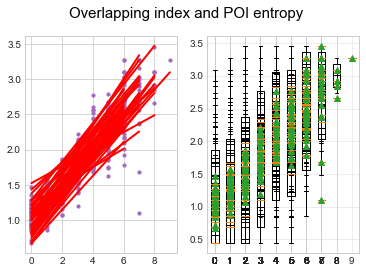

In [ ]:
#city_list=['New York','Albuquerque', 'Atlanta', 'Austin', 'Bakersfield', 'Baltimore', 'Boston', 'Charlotte', 'Chicago', 'Colorado Springs', 'Columbus', 'Dallas', 'Denver', 'Detroit', 'El Paso', 'Fort Worth', 'Fresno', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Long Beach', 'Los Angeles', 'Louisville+Jefferson County metro government', 'Memphis', 'Mesa', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville-Davidson metropolitan government', 'Oakland', 'Oklahoma City', 'Omaha', 'Philadelphia', 'Phoenix', 'Portland', 'Raleigh', 'Sacramento', 'San Antonio', 'San Diego', 'San Francisco', 'San Jose', 'Seattle', 'Tampa', 'Tucson', 'Tulsa', 'Virginia Beach', 'Washington', 'Wichita']

city_list=['New York']

data_list = []

for city in city_list:
    print(city)
    CorrPOI(city,data_list,sdata)
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', linewidth=0.5)

In [ ]:
corr_df

,City,Correlation
0,Albuquerque,0.982925
1,Atlanta,0.959989
2,Austin,0.985475
3,Bakersfield,0.920456
4,Baltimore,0.971524
5,Boston,0.992252
6,Charlotte,0.964176
7,Chicago,0.951341
8,Colorado Springs,0.985992
9,Columbus,0.909762


In [ ]:
corr_df

,City,Correlation
0,Albuquerque,0.982925
1,Atlanta,0.959989
2,Austin,0.985475
3,Bakersfield,0.920456
4,Baltimore,0.971524
5,Boston,0.992252
6,Charlotte,0.964176
7,Chicago,0.951341
8,Colorado Springs,0.985992
9,Columbus,0.909762


In [ ]:
 average value fit

Processing New York
Processing Albuquerque
Processing Atlanta
Processing Austin
Processing Bakersfield
Processing Baltimore
Processing Boston
Processing Charlotte
Processing Chicago
Processing Colorado Springs
Processing Columbus
Processing Dallas
Processing Denver
Processing Detroit
Processing El Paso
Processing Fort Worth
Processing Fresno
Processing Houston
Processing Indianapolis
Processing Jacksonville
Processing Kansas City
Processing Las Vegas
Processing Long Beach
Processing Los Angeles
Processing Louisville+Jefferson County metro government
Processing Memphis
Processing Mesa
Processing Miami
Processing Milwaukee
Processing Minneapolis
Processing Nashville-Davidson metropolitan government
Processing Oakland
Processing Oklahoma City
Processing Omaha
Processing Philadelphia
Processing Phoenix
Processing Portland
Processing Raleigh
Processing Sacramento
Processing San Antonio
Processing San Diego
Processing San Francisco
Processing San Jose
Processing Seattle
Processing Tampa
Proc

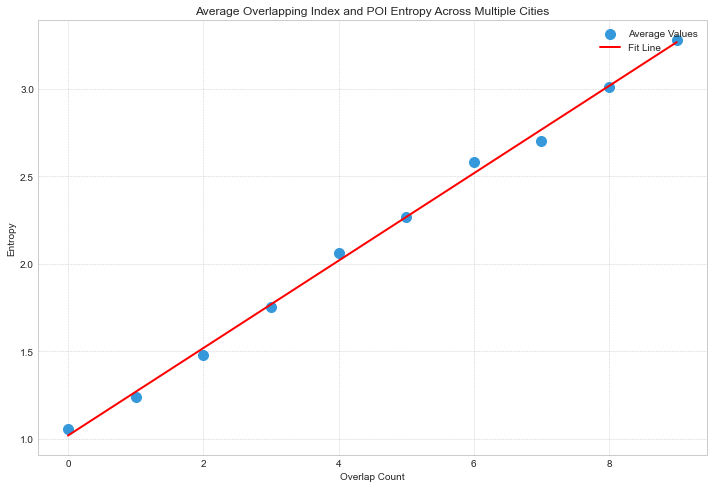

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Set working directory
os.chdir('D:/GNN/OCD/Multicity/')

# Load data
sdata = pd.read_csv('top50_POI_sta.csv')
poi = sdata.iloc[:, -11:]
entropies = poi.apply(lambda x: entropy(x.value_counts(normalize=True), base=2), axis=1)
sdata['entropies'] = entropies

# List of cities to analyze
city_list = ['New York', 'Albuquerque', 'Atlanta', 'Austin', 'Bakersfield', 'Baltimore', 'Boston', 'Charlotte',
             'Chicago', 'Colorado Springs', 'Columbus', 'Dallas', 'Denver', 'Detroit', 'El Paso', 'Fort Worth',
             'Fresno', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Long Beach',
             'Los Angeles', 'Louisville+Jefferson County metro government', 'Memphis', 'Mesa', 'Miami', 'Milwaukee',
             'Minneapolis', 'Nashville-Davidson metropolitan government', 'Oakland', 'Oklahoma City', 'Omaha',
             'Philadelphia', 'Phoenix', 'Portland', 'Raleigh', 'Sacramento', 'San Antonio', 'San Diego', 'San Francisco',
             'San Jose', 'Seattle', 'Tampa', 'Tucson', 'Tulsa', 'Virginia Beach', 'Washington', 'Wichita']

# Dictionary to accumulate mean entropy values
aggregate_data = {}

# Function to calculate correlation and accumulate data per city
def CorrPOI(city, sdata, aggregate_data):
    communitydata = pd.read_csv(f'result_{city}.csv')
    communitydata.rename(columns={'GISJOIN_1': 'GISJOIN'}, inplace=True)

    data = pd.merge(communitydata, sdata, on='GISJOIN')
    data = data[data['entropies'] != 0]

    threshold = 0.5
    col_com = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    for col in col_com:
        data[col] = data[col].apply(lambda x: 1 if x > threshold else 0)

    data['overlap_count'] = data[col_com].sum(axis=1)
    mean_pd = pd.DataFrame(data.groupby('overlap_count')['entropies'].mean())
    mean_pd['overlap_count'] = mean_pd.index

    # Accumulate data into aggregate_data
    for index, row in mean_pd.iterrows():
        if row['overlap_count'] not in aggregate_data:
            aggregate_data[row['overlap_count']] = []
        aggregate_data[row['overlap_count']].append(row['entropies'])

# Calculate per-city data and accumulate it
for city in city_list:
    print(f"Processing {city}")
    CorrPOI(city, sdata, aggregate_data)

# Calculate the mean entropy for each overlap count
mean_aggregate = {k: np.mean(v) for k, v in aggregate_data.items()}
x_mean = np.array(list(mean_aggregate.keys()))
y_mean = np.array(list(mean_aggregate.values()))

# Calculate the correlation coefficient
corr_mean = np.corrcoef(x_mean, y_mean)[0, 1]
print(f"Correlation coefficient between overlap count and mean entropy: {corr_mean:.2f}")

# Fit a line to the aggregated mean values
z_mean = np.polyfit(x_mean, y_mean, 1)
p_mean = np.poly1d(z_mean)

# Plot the results
plt.figure(figsize=(12, 8))
plt.title('Average Overlapping Index and POI Entropy Across Multiple Cities')
plt.xlabel('Overlap Count')
plt.ylabel('Entropy')
plt.scatter(x_mean, y_mean, c='#3498DB', s=100, label='Average Values')
plt.plot(x_mean, p_mean(x_mean), "r", linewidth=2, label='Fit Line')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='upper right')
plt.savefig('POI_entropy_average.pdf', dpi=300, bbox_inches='tight')
